# Notebook 1: Loading the CMIP data 

In this notebook, we focus on loading in the data from the CMIP6 site. We can then work on histogramming the data in order to understand the variability within the models

*Most of the code is from project pythia

In [1]:
# Import statements
import xarray as xr
xr.set_options(display_style='html')
import intake
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
514813,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514814,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514815,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514816,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [3]:
cmipdf = col.df
cmipdf['source_id'].unique()

array(['CMCC-CM2-HR4', 'EC-Earth3P-HR', 'HadGEM3-GC31-MM',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LM', 'EC-Earth3P', 'ECMWF-IFS-HR',
       'ECMWF-IFS-LR', 'HadGEM3-GC31-LL', 'CMCC-CM2-VHR4', 'GFDL-CM4',
       'GFDL-AM4', 'IPSL-CM6A-LR', 'E3SM-1-0', 'CNRM-CM6-1', 'GFDL-ESM4',
       'GFDL-ESM2M', 'GFDL-CM4C192', 'GFDL-OM4p5B', 'GISS-E2-1-G',
       'GISS-E2-1-H', 'CNRM-ESM2-1', 'BCC-CSM2-MR', 'BCC-ESM1', 'MIROC6',
       'AWI-CM-1-1-MR', 'EC-Earth3-LR', 'IPSL-CM6A-ATM-HR', 'CESM2',
       'CESM2-WACCM', 'CNRM-CM6-1-HR', 'MRI-ESM2-0', 'SAM0-UNICON',
       'GISS-E2-1-G-CC', 'UKESM1-0-LL', 'EC-Earth3', 'EC-Earth3-Veg',
       'FGOALS-f3-L', 'CanESM5', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'NESM3', 'MPI-ESM-1-2-HAM', 'CAMS-CSM1-0',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'MRI-AGCM3-2-H', 'MRI-AGCM3-2-S',
       'MCM-UA-1-0', 'INM-CM5-H', 'KACE-1-0-G', 'NorESM2-LM',
       'FGOALS-f3-H', 'FGOALS-g3', 'MIROC-ES2L', 'FIO-ESM-2-0', 'NorCPM1',
       'NorESM1-F', 'MPI-ESM1-2-XR'

From above, we know that we need 3 specific models/source_ids: CanESM5, HadGEM3-GC31-MM, GISS-E2-1-H. In addition to this, we know that we want monthly precipitation data, so we need variable_id = "pr" and table_id = "Amon". Lastly, we'll also need the historical data at this point.

# CanESM5

In [4]:
can_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "CanESM5", experiment_id = 'historical')
can_subset.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r11i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429
1,CMIP,CCCma,CanESM5,historical,r11i1p2f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429
2,CMIP,CCCma,CanESM5,historical,r13i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429
3,CMIP,CCCma,CanESM5,historical,r13i1p2f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429
4,CMIP,CCCma,CanESM5,historical,r14i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429
...,...,...,...,...,...,...,...,...,...,...,...
60,CMIP,CCCma,CanESM5,historical,r31i1p2f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429
61,CMIP,CCCma,CanESM5,historical,r35i1p2f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429
62,CMIP,CCCma,CanESM5,historical,r33i1p2f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429
63,CMIP,CCCma,CanESM5,historical,r7i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429


In [5]:
dset_dict = can_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


We want an approximate box of 115 to 135 lon and 49 to 60 lat, and we want a slice from 1960 to 2010

In [6]:
list(dset_dict.keys())
can_dset = dset_dict['CMIP.CCCma.CanESM5.historical.Amon.gn']
bc_dset = can_dset.sel(lon = slice(115.3125, 135.), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
bc_dset

<xarray.Dataset>
Dimensions:         (lat: 3, bnds: 2, lon: 8, member_id: 65, dcpp_init_year: 1,
                     time: 612)
Coordinates:
  * lat             (lat) float64 51.63 54.42 57.21
    lat_bnds        (lat, bnds) float64 dask.array<chunksize=(3, 2), meta=np.ndarray>
  * lon             (lon) float64 115.3 118.1 120.9 123.8 ... 129.4 132.2 135.0
    lon_bnds        (lon, bnds) float64 dask.array<chunksize=(8, 2), meta=np.ndarray>
  * time            (time) object 1960-01-16 12:00:00 ... 2010-12-16 12:00:00
    time_bnds       (time, bnds) object dask.array<chunksize=(612, 2), meta=np.ndarray>
  * member_id       (member_id) object 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: bnds
Data variables:
    pr              (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 480, 3, 8), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     pr
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Amon.gn

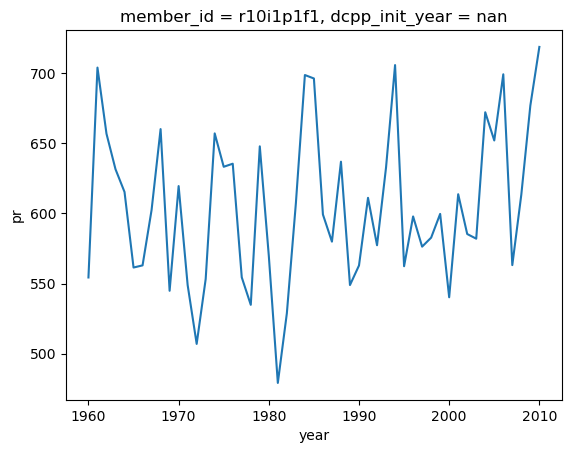

In [7]:
# Need to figure out how to take a yearly average, and plot that as a time series
test1 = bc_dset.sel(member_id='r10i1p1f1')
test1 *= 86400*30.4
test2 = test1.groupby('time.year').sum()
test2.mean(['lon', 'lat']).pr.plot()
# plt.title("Yearly precipitation for a certain model_id")
# plt.xlabel('Year')
# plt.ylabel('Precipitation total (mm)')

In [8]:
mean_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the CanESM5 GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [ ]:
var_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])
var_precip.var('member_id').pr.plot()


Last thing to do now is to convert the units to mm/year

In [ ]:
var_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365


# HadGEM3

In [ ]:
had_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "HadGEM3-GC31-MM", experiment_id = 'historical')
dset_dict = had_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
had_dset = dset_dict['CMIP.MOHC.HadGEM3-GC31-MM.historical.Amon.gn']

In [ ]:
had_bc_dset = had_dset.sel(lon = slice(115.3125, 136.25), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
had_bc_dset

In [ ]:
mean_precip_had = had_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip_had.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the HadGEM3 GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

# GISS

In [12]:
gis_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "GISS-E2-1-H", experiment_id = 'historical')
dset_dict = gis_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
gis_dset = dset_dict['CMIP.NASA-GISS.GISS-E2-1-H.historical.Amon.gn']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [14]:
gis_bc_dset = gis_dset.sel(lon = slice(116.25, 135.), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))

Text(0, 0.5, 'Precipitation total (mm)')

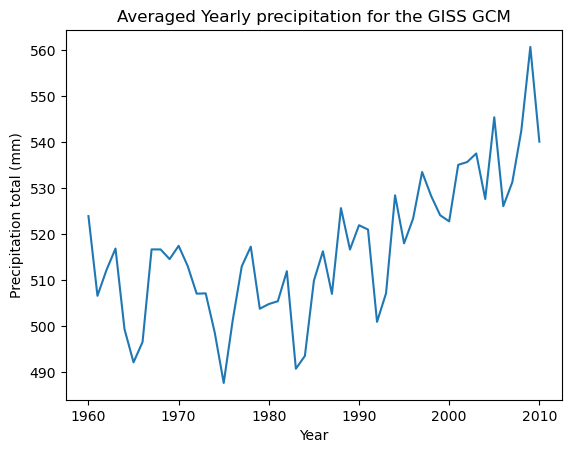

In [15]:
mean_precip_gis = gis_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip_gis.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the GISS GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

In [ ]:
# Storage code

# This just displays a time series over months and decades
# test1 = bc_dset.sel(member_id='r10i1p1f1')
# mean_precip = test1.mean(['lon', 'lat'])
# mean_precip
# # mean_precip.pr.plot()